# Visualisierung von DataFrames

## Lernziele

```{admonition} Lernziele
:class: hint
* TODO
```

Aber wie kombinieren wir jetzt die Funktionalitäten des Pandas-Moduls mit denen
des Matplotlib-Moduls? Der grundlegende Datentyp für Matplotlib ist das
NumPy-Array und auch in den Pandas-Datenobjekten stecken im Kern NumPy-Arrays.
Wenn wir also Pandas-Objekte visualisieren wollen, extrahieren wir die Daten als
NumPy-Arrays und plotten dann diese mit Matploblib.

Wir benutzen die folgenden Methoden: 

* ``.index`` liefert den Zeilenindex
* ``.columns`` liefert die Spaltennamen 
* ``.values`` liefert die Werten in der Tabelle als NumPy-Array

Hier ein Beispiel:

In [1]:
import pandas as pd

alter = pd.Series({"Alice" : 25, "Bob" : 22, "Charlie" : 30, "Dora": 43})
stadt = pd.Series({"Alice" : "Mannheim", "Bob" : "Frankfurt", "Charlie" : "Ludwigshafen", "Dora" : "Kaiserslautern"})
personen = pd.DataFrame({'Alter': alter, 'Wohnort': stadt})

print('Datentyp personen: ', type(personen) )
print('Inhalt personen: ', personen)
print('\n')

print('Datentyp personen.index: ', type(personen.index))
print('Inhalt personen.index', personen.index)
print('\n')

print('Datentyp personen.columns: ', type(personen.columns))
print('Inhalt personen.columns', personen.columns)
print('\n')

print('Datentyp personen.values: ', type(personen.values))
print('Inhalt personen.values', personen.values)
print('\n')

Datentyp personen:  <class 'pandas.core.frame.DataFrame'>
Inhalt personen:           Alter         Wohnort
Alice       25        Mannheim
Bob         22       Frankfurt
Charlie     30    Ludwigshafen
Dora        43  Kaiserslautern


Datentyp personen.index:  <class 'pandas.core.indexes.base.Index'>
Inhalt personen.index Index(['Alice', 'Bob', 'Charlie', 'Dora'], dtype='object')


Datentyp personen.columns:  <class 'pandas.core.indexes.base.Index'>
Inhalt personen.columns Index(['Alter', 'Wohnort'], dtype='object')


Datentyp personen.values:  <class 'numpy.ndarray'>
Inhalt personen.values [[25 'Mannheim']
 [22 'Frankfurt']
 [30 'Ludwigshafen']
 [43 'Kaiserslautern']]




So kann man direkt die Daten aus einem Pandas-Dataframe extrahieren und visualisieren.

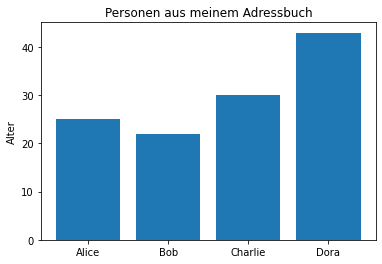

In [2]:
import matplotlib.pylab as plt

# data
x = personen.index
y = personen.loc[:, 'Alter'].values

# plot
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_ylabel('Alter')
ax.set_title('Personen aus meinem Adressbuch');

## Plot von Mittelwert 

Wir gehen wieder zu einem realistischen Datensatz über und importieren den uns
schon bekannten Datensatz der Top7-Fußballvereine der Bundesliga 2020/21.

In [4]:
data = pd.read_csv('bundesliga_top7_offensive.csv', index_col=0)
data.head(10)

,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
Name,,,,,,,,,,,,,,,
Manuel Neuer,Bayern Munich,GER,GK,34,33,33,2970,0,0,0,0,0.00,0.01,1,0
Thomas Müller,Bayern Munich,GER,MF,30,32,31,2674,11,19,1,1,0.24,0.39,0,0
David Alaba,Bayern Munich,AUT,"DF,MF",28,32,30,2675,2,4,0,0,0.04,0.08,4,0
Jérôme Boateng,Bayern Munich,GER,DF,31,29,29,2368,1,1,0,0,0.01,0.02,6,0
Robert Lewandowski,Bayern Munich,POL,FW,31,29,28,2458,41,7,8,9,1.16,0.13,4,0
Joshua Kimmich,Bayern Munich,GER,MF,25,27,25,2194,4,10,0,0,0.10,0.27,4,0
Kingsley Coman,Bayern Munich,FRA,"FW,MF",24,29,23,1752,5,10,0,0,0.21,0.34,1,0
Benjamin Pavard,Bayern Munich,FRA,DF,24,24,22,1943,0,0,0,0,0.02,0.09,3,0
Alphonso Davies,Bayern Munich,CAN,DF,19,23,22,1763,1,2,0,0,0.01,0.04,2,1


Wir filtern die Spieler der Eintracht Frankfurt heraus und viualisieren das Alter.

/var/folders/6z/zh1_t3tx1c300_xqgwq7hk580000gn/T/ipykernel_5162/3458565402.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


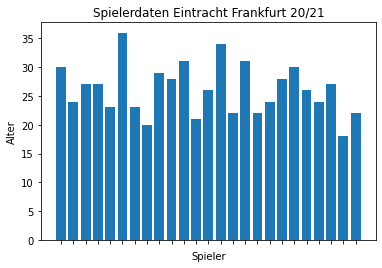

In [10]:
# data
filter = data.loc[:, 'Club'] == 'Eintracht Frankfurt'
data_eintracht_frankfurt = data.loc[filter, :]
x = data_eintracht_frankfurt.index
y = data_eintracht_frankfurt.loc[:, 'Age']

# plot
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_xlabel('Spieler')
ax.set_ylabel('Alter')
ax.set_title('Spielerdaten Eintracht Frankfurt 20/21');